<font size="6"> Zillow Property Value Predictions</font> <br><br>
<font size="5"> Description </font><br><br>
In the rapidly evolving real estate market, accurate property valuation holds immense importance for homeowners and property investors alike. This project is dedicated to developing a predictive model for property values of Single Family Properties that underwent transactions during the year 2017. It directly addresses the critical need to provide accurate property values.<br><br>
<font size="5"> Goals </font><br><br>
The primary goal of the Zillow Property Value Predictions project is to predict property values accurately. To achieve this goal, we have established the following objectives:

- **Data Collection and Preprocessing:** Gather and clean Zillow property data to create a comprehensive dataset suitable for analysis.

- **Exploratory Data Analysis:** Perform exploratory analysis to identify trends, patterns, and potential correlations related to the value of the properties.

- **Feature Importance Determination:** Employ machine learning techniques to assess the importance of various features in predicting property values, aiding in identifying critical factors.

- **Model Building and Evaluation:** Develop predictive models for property values, compare their performance, and select the most effective one for accurate value prediction.


<font size="5">Dictionary</font><br>

| Term Name              | Description                                                |
|------------------------|------------------------------------------------------------|
| bedrooms               | Number of bedrooms in the property.                       |
| bathrooms              | Number of bathrooms in the property.                      |
| area                   | Area of the property in square feet.                      |
| value                  | Property value in dollars.                                |
| year                   | Year the property was built.                              |
| county                 | County where the property is located.                     |
| state                  | State where the property is located.                      |
| total_rooms            | Total number of rooms (bedrooms + bathrooms).             |
| age                    | Age of the property (current year - year built).          |
| bdrm_area_ratio        | Bedroom-to-area ratio.                                    |
| bath_bdrm_ratio        | Bathroom-to-bedroom ratio.                               |
| group_area             | Categorical group based on property area.                 |
| group_age              | Categorical group based on property age.                  |
| FIPS Code              | A numerical code used for mapping locations to county and state names in the dataset. |
| RMSE                   | Root Mean Squared Error, a measure of prediction accuracy in regression models. |
| Outliers               | Data points that deviate significantly from the majority of the data and can affect analysis and modeling. |
| Feature Selection      | Techniques used to select relevant features: SelectKBest, RFE (Recursive Feature Elimination), and Lasso.
| Polynomial Features    | New features created by raising existing features to different powers to capture non-linear relationships. |

<br><br><br><br>
<font size="5"> Imports </font>

In [1]:
# imports:

import pandas as pd
import numpy as np
# import os

from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import prepare as prep
import explore as exp
import visuals as vis
import model as mdl

In [2]:
# df_3mup = df[df['value'] > 4000000]
# df_3mup.head()
# plt.figure(figsize=(8, 5))
# plt.hist(df_3mup['value'], bins=10, color='#1f77b4', edgecolor='black')
# # Show the plot
# plt.show()

<font size="5">Acquire</font>
<br>
<br>
- Data acquired from the 'Zillow' SQL database.
- The database was queried for specific property data for the year `2017`.
- The data consists of `52,246` rows and `7 columns`.
- Each row represents a property with its respective attributes.
- Each column represents a specific property feature

<font size="5">Prepare</font>
<br>
<br>
**Column Renaming:**
- Columns were renamed for clarity and consistency:
  - bedroomcnt → bedrooms
  - bathroomcnt → bathrooms
  - calculatedfinishedsquarefeet → area
  - taxvaluedollarcnt → value
  - yearbuilt → year

**FIPS Code Mapping:**
- FIPS codes were mapped to county and state name. Two new columns, `county` and `state`, were added to the DataFrame based on the 'fips' column.

**Data Cleaning:**
- Rows with missing values (nulls) were removed from the dataset.
  - Found 122 observations with missing area or year built. 
- Rows where either the number of bedrooms or bathrooms was equal to 0 were excluded.
  - Found 73 observations with 0 bedrooms or bathrooms
- Columns 'parcelid' and 'fips' were dropped as they were unnecessary.

**Data Type Conversion:**
- The data types of specific columns were converted to the 'int' data type for consistency.
  - The columns converted included 'bedrooms,' 'area,' 'value,' and 'year.'

<font size="4">A brief look at the data:</font><br>

In [3]:
# Get the data
df = prep.prepare_pipeline()
# Display the first few rows of the dataset.
df.head()

,bedrooms,bathrooms,area,value,year,county,state
0,4,3.5,3100,1023282,1998,Orange,CA
1,2,1.0,1465,464000,1967,Ventura,CA
2,3,2.0,1243,564778,1962,Orange,CA
3,4,3.0,2376,145143,1970,Los Angeles,CA
4,4,3.0,2962,773303,1950,Los Angeles,CA


<font size="4">Lets take a look at the distribution of the target.</font><br>

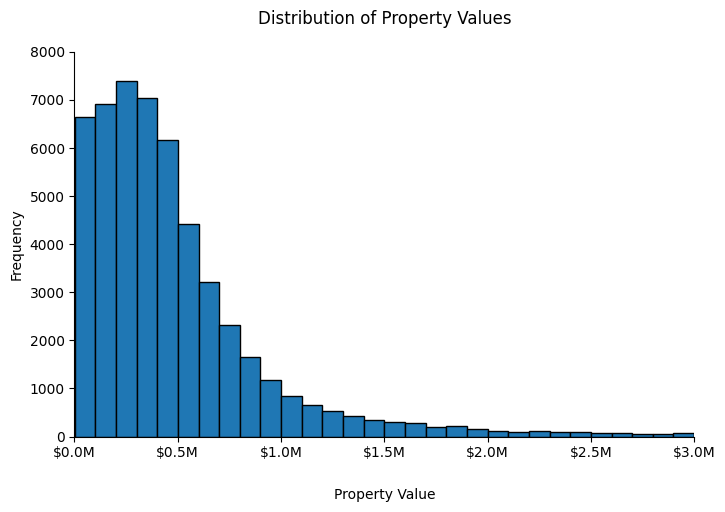

In [4]:
# Display overall value distribution
vis.plot_value_distribution(df)

<font size="3">**Note:** X axis was limited to $3M</font><br>

- I hid less than 1% of the top property values in order to properly visualize the distribution.
- Max property value found in the dataset is $49M


<font size="4">Lets take a look at the distribution of the other features</font><br>

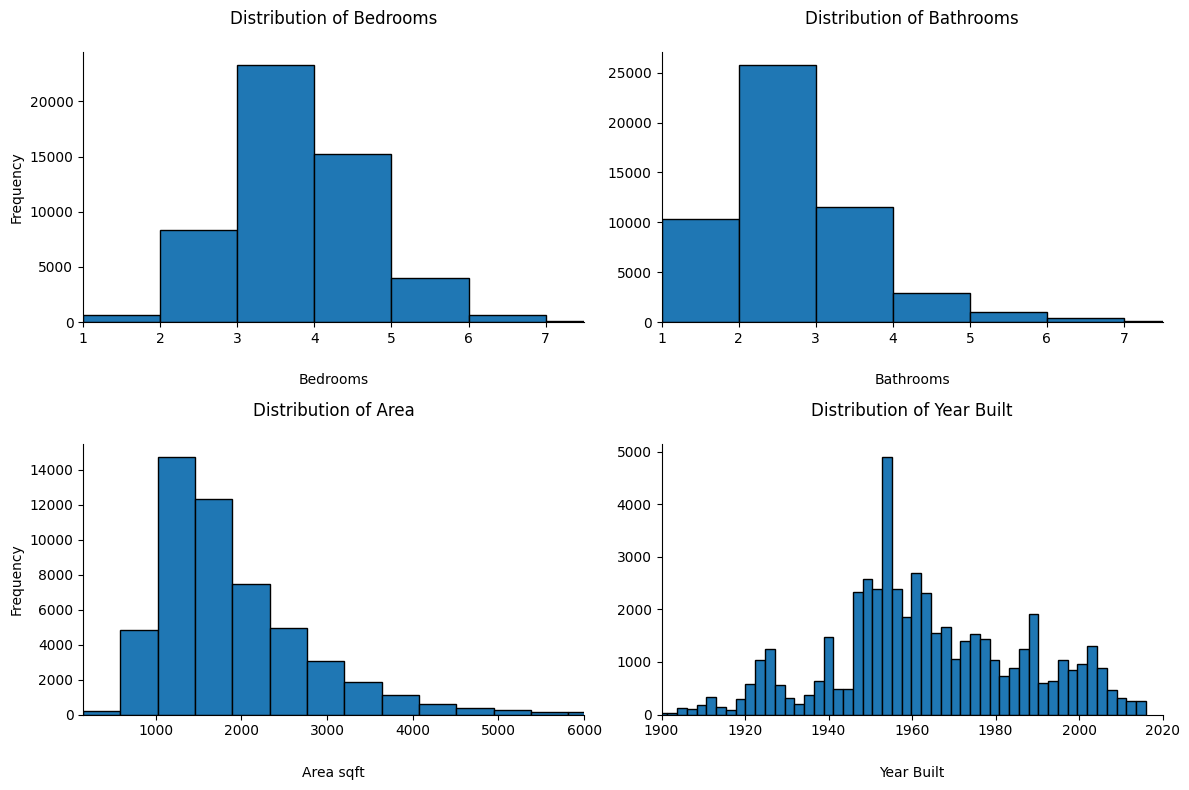

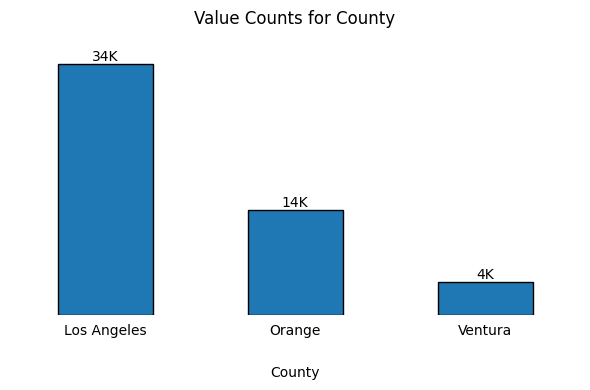

In [5]:
# Display the distribution of Bedrooms, Bathrooms, Area, Year and value counts for county. 
vis.plot_features_distribution(df)

<font size="3">**Note:** Once again, X axis was limited.</font><br>

- Bedrooms and bathrooms limited to 7 which accounts for less than 0.25% of the total observations
    - Max bedrooms: 14
    - Max bathrooms:18<br><br>
- Area limited to 6,000 sqft which accounts for about 0.5% of the total observations. 
    - Max area: 20,000+ sqft


<font size="5">Exploration</font><br>



**Data Splitting:**
- The data was split into `training`, `validation`, and `test` sets for exploration / machine learning purposes. A `70-15-15` split was applied, with 70% of the data used for training and the remaining 30% split evenly between validation and test sets.


In [6]:
# Execute the zillow_pipeline function to obtain a DataFrame containing Zillow data.
train, val, test = prep.explore_pipeline()

<font size="4"> **Hypothesis 1: Property Size Impact**</font>
   <font size="3"> 
   
   - *Question:* `Does the size of a property impact its value?`
   </font>

   - *Null Hypothesis (H0):* There is no significant relationship between property size (square footage) and property value.
   - *Alternative Hypothesis (H1):* Property size (square footage) is significantly related to property value.


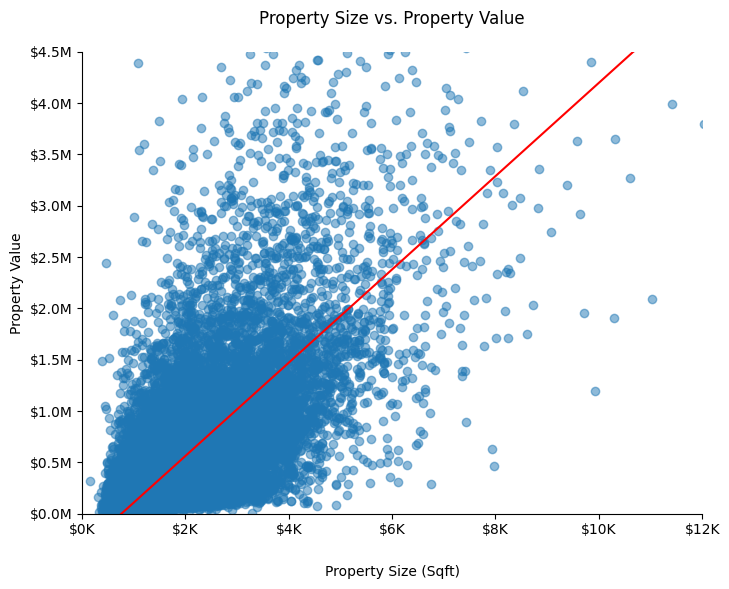

In [7]:
# Visualize area and "value" using a scatter plot.
vis.area_vs_value_trend_plt(train)

<font size="3">**Note:** X and Y axis was limited.</font><br>


In [8]:
# Perform a Spearman rank-order correlation test to analyze the association between area and value.
exp.perform_spearmanr_test(train,'area')

Result: There is a significant monotonic relationship between area and value (p-value=0.0000, r-value=0.5333).


**Hypothesis 1 Result:** `We reject the null hypothesis`, there is a statistically significant `moderate positive` monotonic relationship between the property values and the area(sqft). 

<font size="4"> **Hypothesis 2: Property Age Impact**</font>
   <font size="3"> 
   
   - *Question:* `Does the age of a property (year built) influence its value?`
   </font>


   - *Null Hypothesis (H0):* There is no significant relationship between the age of a property (year built) and property value.
   - *Alternative Hypothesis (H1):* The age of a property (year built) is significantly related to property value.


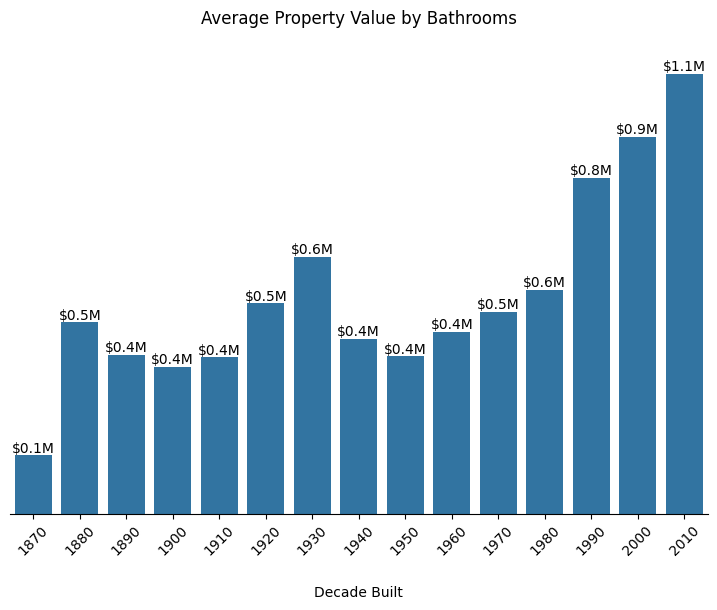

In [9]:
# Visualize year built and average value using a bar plot.
vis.age_vs_value_plt(train)

In [10]:
# Perform a Spearman rank-order correlation test to analyze the association between year built and value.
exp.perform_spearmanr_test(train,'year')

Result: There is a significant monotonic relationship between year and value (p-value=0.0000, r-value=0.2801).


**Hypothesis 2 Result:** `We reject the null hypothesis`, there is a statistically significant `weak positive` monotonic relationship between the property values and the area(sqft). 

<font size="4"> **Hypothesis 3 & 4: Bedroom or Bathroom impact** </font>
   <font size="3"> 
   
   - *Question:* `Do properties with a higher number of bedrooms or bathrooms tend to have higher values?`
   </font>



   - *Null Hypothesis (H0):* There is no significant difference in the distribution of value across different bathrooms or bedrooms.
   - *Alternative Hypothesis (H1):* There is a significant difference in the distribution of value across different bathrooms or bedrooms.


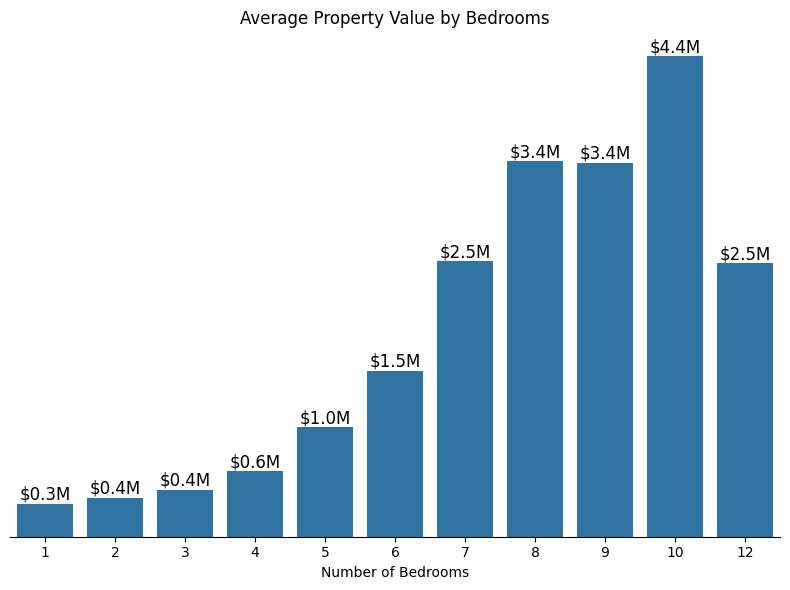

In [11]:
# Visualize bedrooms and average value using a bar plot.
vis.bedr_vs_value_plt(train)

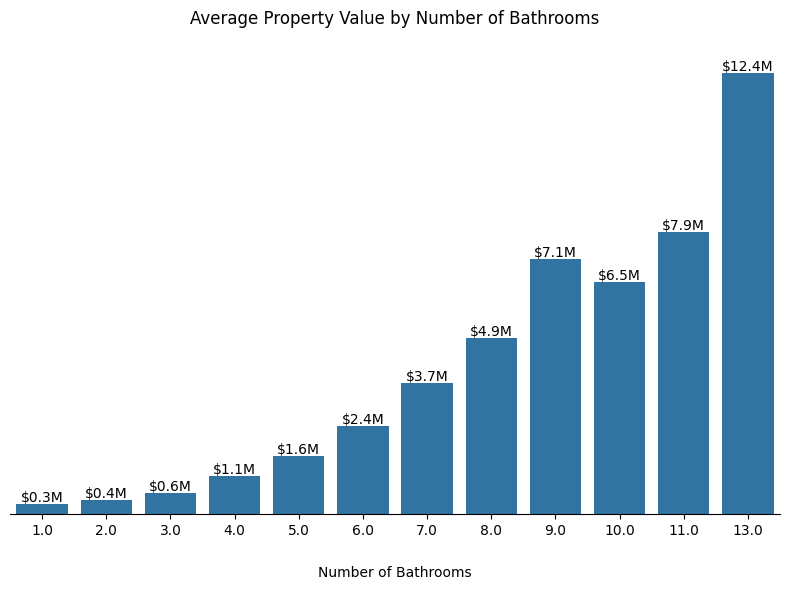

In [12]:
# Visualize bathrooms and average value using a bar plot.
vis.bathr_vs_value_plt(train)

In [13]:
# Perform a Kruskal-Wallis test to analyze the relationship between the 'bedrooms' variable and 'value'.
exp.perform_kruskal(train, 'bedrooms', 'value')

# Perform a Kruskal-Wallis test to analyze the relationship between the 'bathrooms' variable and 'value'.
exp.perform_kruskal(train, 'bathrooms', 'value')

Kruskal-Wallis Test
-----------------------------------------------------
Result: Reject the null hypothesis, There is a significant difference in the distribution of value across different bedrooms.
H-statistic: 3543.5758
P-value: 0.0
Kruskal-Wallis Test
-----------------------------------------------------
Result: Reject the null hypothesis, There is a significant difference in the distribution of value across different bathrooms.
H-statistic: 10145.1661
P-value: 0.0


**Hypothesis 3 Result:** `We reject the null hypothesis`, there is a significant difference in the distribution of value across different bedrooms.

**Hypothesis 4 Result:** `We reject the null hypothesis`, there is a significant difference in the distribution of value across different bathrooms.

<font size="4"> **Hypothesis 5: Location Impact**</font>
   <font size="3"> 
   
   - *Question:* `Does the county of a property impact its value?`
   </font>


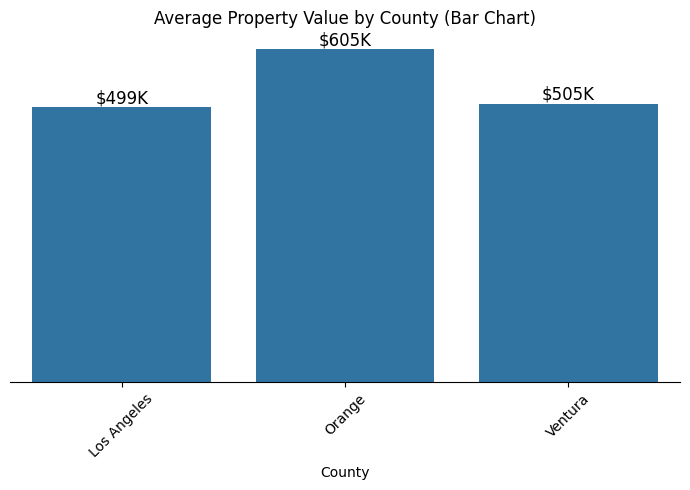

In [14]:
# Visualize county and average value using a bar plot.
vis.county_vs_value_plt(train)

   - *Null Hypothesis (H0):* There is no significant difference in the mean value across different counties.
   - *Alternative Hypothesis (H1):* There is a significant difference in the mean value across at least two counties.

In [15]:
# Perform a Kruskal-Wallis test to analyze the relationship between the 'bathrooms' variable and 'value'.
exp.perform_kruskal(train, 'county', 'value')

Kruskal-Wallis Test
-----------------------------------------------------
Result: Reject the null hypothesis, There is a significant difference in the distribution of value across different county.
H-statistic: 1281.9993
P-value: 4.1436991204032774e-279


**Hypothesis 5 Result:** `We reject the null hypothesis`, There is a significant difference in the distribution of value across different county.

<font size="5">Exploration Summary</font><br>

We performed `SpearmanR` test on: 

 - Area
 - Year

We performed `Kruskal-Wallis` test on:
 - Bedrooms
 - Bathrooms  
 - County

`All indicated a significant relationship`.


<font size="5">Feature Engineering</font><br>

6 additional columns:
- *`'total_rooms'`*: Total number of rooms, calculated as the sum of bedrooms and bathrooms.
- *`'age'`*:Age of each entry, calculated as the difference between the current year and the 'year' column.
- *`'bdrm_area_ratio'`*: Bedroom-to-area ratio, calculated as 'area' divided by 'bedrooms'. (2,000sqft / 4bdrm = 500)
- *`'bath_bdrm_ratio'`*: Bathroom-to-bedroom ratio, calculated as 'bathrooms' divided by 'bedrooms'. (2bthrm / 4bdrm = 0.5)
- *`'group_area'`*: categorizes values in the 'area' column based on percentiles. (top_1%', 'middle_50%', 'bottom_1%', ...)
- *`'group_age'`*: categorizes values in the 'age' column based on percentiles. (top_1%', 'middle_50%', 'bottom_1%', ...)

In [16]:
# Add new features to the train dataset.
train = mdl.features(train)


In [17]:
# Show the first few rows of the train dataset. 
train.head()

,bedrooms,bathrooms,area,value,year,county,state,total_rooms,age,bdrm_area_ratio,bath_bdrm_ratio,group_area,group_age
20022,3,2.0,1686,169189,1947,Orange,CA,5.0,76,562.000000,0.666667,middle_50%,top_20%
22947,5,3.5,3658,1193666,1970,Ventura,CA,8.5,53,731.600000,0.700000,top_10%,middle_50%
18000,3,1.0,1040,35983,1927,Los Angeles,CA,4.0,96,346.666667,0.333333,bottom_20%,top_10%
10496,3,2.5,2197,657564,1985,Orange,CA,5.5,38,732.333333,0.833333,middle_50%,bottom_25%
41940,4,4.0,2464,1096680,1987,Los Angeles,CA,8.0,36,616.000000,1.000000,top_25%,bottom_20%


In [18]:
# Use the Min Max Scaler to scale the features (except the target feature)
train = exp.MinMax_Scaler(train)


In [19]:
# Perform one-hot encoding to convert categorical features into numerical format.
train = exp.hot_encode(train)

We performed feature selection using:
 
- `SelectKbest`
- `RFE`
- `LASSO`

In [20]:
# Perform feature selection analysis to identify the top 4 features that influence the value variable.
exp.feature_selections_results(train, 'value', 4)

,Kbest,RFE,Lasso
0,area,bedrooms,area
1,bathrooms,bathrooms,bedrooms
2,bdrm_area_ratio,total_rooms,bdrm_area_ratio
3,total_rooms,age,bathrooms


<font size="5">Feature Engineering Summary</font><br><br>

After conducting the feature selection methods, `7 features` were selected for modeling. 

We are moving forward with the following features to modeling:

Original
- Area
- Bedrooms
- Bathrooms
- Age

Engineered
- `total_rooms`
- `bdrm_area_ratio`
- `bath_bdrm_ratio`

<font size="5">Modeling</font><br>

Calculate the Root Mean Squared Error `(RMSE)` between actual target values and baseline predictions. <br>
The baseline prediction is computed as the `mean` of the actual target values (y_train).

In [21]:
mdl.eval_baseline()

755431.5736908859

- I will use the Root Mean Squared Error `(RMSE)` as my evaluation metric for regression models.
- Models will be `evaluated on train and validate` data
- Baseline RMSE is `$755,431.57` on train data
- The model that performs the best will then be evaluated on test data


<font size="3">Preprocessing for machine learning by: </font><br><br>

- Drop: 
    - 'year'
    - 'county'
    - 'state'
    - 'bath_bdrm_ratio'
    - 'group_area'
    - 'group_age'
<br>
<br>
- Split:
    - 70% training set
    - 5% validation set
    - 15% test set.
<br>
<br>
- Filter train:
    - Bedrooms: Drop more than 6 bedrooms (`bedrooms <= 6`)
    - Bathrooms: Drop more than 6 bathrooms (`bathrooms <= 6`)
    - Area: Drop less than 700sqft or more than 5,500sqft (`700 <= area <= 5,500`)
    - bdrm_area_ratio: Drop less than 100sqft or more than 2,000sqft per bedroom. (`100 <= ratio <= 2,000`)
    - Total dropped: `3%`
<br>
<br>
- Separates features (X) and labels (y) for the training and validation sets
- Scaling using Min-Max.
<br><br>



In [22]:
X_train, y_train, X_val, y_val, X_test, y_test = mdl.mdata_pipeline(df)

Last look at the data for modeling:

In [23]:
X_train.head()

,bedrooms,bathrooms,area,total_rooms,age,bdrm_area_ratio
3491,0.4,0.2,0.245990,0.3,0.391304,0.244679
15404,0.4,0.4,0.317850,0.4,0.391304,0.308532
14924,0.6,0.2,0.130181,0.4,0.405797,0.080511
16572,0.4,0.0,0.070194,0.2,0.485507,0.088469
46841,0.4,0.0,0.106020,0.2,0.775362,0.120304


<font size="5">Models</font><br>

<font size="4">XGBoost</font><br><br>


In [24]:
xgbr, model_results = mdl.train_model(XGBRegressor, X_train, y_train, X_val, y_val)

The train RMSE is $323,977.06.
The validate RMSE is $495,722.13.


<font size="4">`Add Polynomial Features`</font><br><br>

 transforming the original features of a dataset into a set of polynomial features.



In [25]:
X_train, X_val, X_test = mdl.poly_features(X_train, X_val, X_test)

<font size="4">LinearRegression</font><br><br>


In [26]:
lrm, model_results = mdl.train_model(LinearRegression, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $433,219.80.
The validate RMSE is $484,395.01.


<font size="4">LassoLars</font><br><br>


In [27]:
lasso, model_results = mdl.train_model(LassoLars, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $433,224.11.
The validate RMSE is $484,373.41.


<font size="4">Random Forest</font><br><br>


In [28]:
rforest_test, model_results = mdl.train_model(RandomForestRegressor, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $182,225.41.
The validate RMSE is $507,055.22.


<font size="4">`RMSE Results`</font><br><br>

In [29]:
model_results

,Model,Train_RMSE,Val_RMSE
0,XGBRegressor,"$323,977.06","$495,722.13"
1,LinearRegression,"$433,219.80","$484,395.01"
2,LassoLars,"$433,224.11","$484,373.41"
3,RandomForestRegressor,"$182,225.41","$507,055.22"


<font size="5">Comparing Models</font><br><br>

 - RandomForestRegressor, XGBoost, LinearRegression and LassoLars models all performed better than baseline.
 - I have chosen to move forward with the `LassoLars` model as it performs slightly better than LinearRegression and had a the best overall predictive performance.

<font size="5">LassoLars on Test Data</font><br><br>

In [30]:
test_results = mdl.test_model(lasso, X_test, y_test)

The test RMSE is $412,174.56.


<font size="4">`RMSE Results on TEST`</font>
#### $412K

<font size="5">Modeling Summary</font><br><br>

 - `LassoLars model scored RMSE $412k` compared to the `baseline of $755k`, it had an improvement of approx $343k.

<font size="5">Conclusions</font><br><br>

 - Found a strong relationship between area, bathrooms and bedrooms to the value of the property.
 - Engineered 6 new columns based on the relationships found.
   - *'total_rooms'*
   - *'age'*
   - *'bdrm_area_ratio'*
   - *'bath_bdrm_ratio'*
   - *'group_area'*
   - *'group_age'* <br><br>
 - Performed feature selection to find top features:
 
    Original
    - Area
    - Bedrooms
    - Bathrooms
    - Age

    Engineered
    - total_rooms
    - bdrm_area_ratio
    - bath_bdrm_ratio<br><br>
 - The final model significantly out performed the baseline.

<font size="5">Recommendations</font><br><br>

With additional time to improve the model, I would:
 - Include additional features from the zillow data.
 - Create additional model to handle outliers.
 - Create location based cluster features.
 - Dive into hyperparameter to improve the models.